<a href="https://colab.research.google.com/github/kushp1203/Hackathon-Projects/blob/main/StockPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import math
import pandas_datareader as web
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

Using TensorFlow backend.


In [ ]:
company = 'MSFT'
company

'MSFT'

In [ ]:

df = web.DataReader(company, data_source='yahoo', start='2012-01-01', end='2020-02-21')
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,26.959999,26.389999,26.549999,26.770000,64731500.0,22.020796
2012-01-04,27.469999,26.780001,26.820000,27.400000,80516100.0,22.539021
2012-01-05,27.730000,27.290001,27.379999,27.680000,56081400.0,22.769344
2012-01-06,28.190001,27.530001,27.530001,28.110001,99455500.0,23.123066
2012-01-09,28.100000,27.719999,28.049999,27.740000,59706800.0,22.818701
...,...,...,...,...,...,...
2020-02-14,185.410004,182.649994,183.250000,185.350006,23149500.0,184.845123
2020-02-18,187.699997,185.500000,185.610001,187.229996,27792200.0,186.720001
2020-02-19,188.179993,186.470001,188.059998,187.279999,29997500.0,187.279999


In [ ]:
df.shape

(2047, 6)

/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


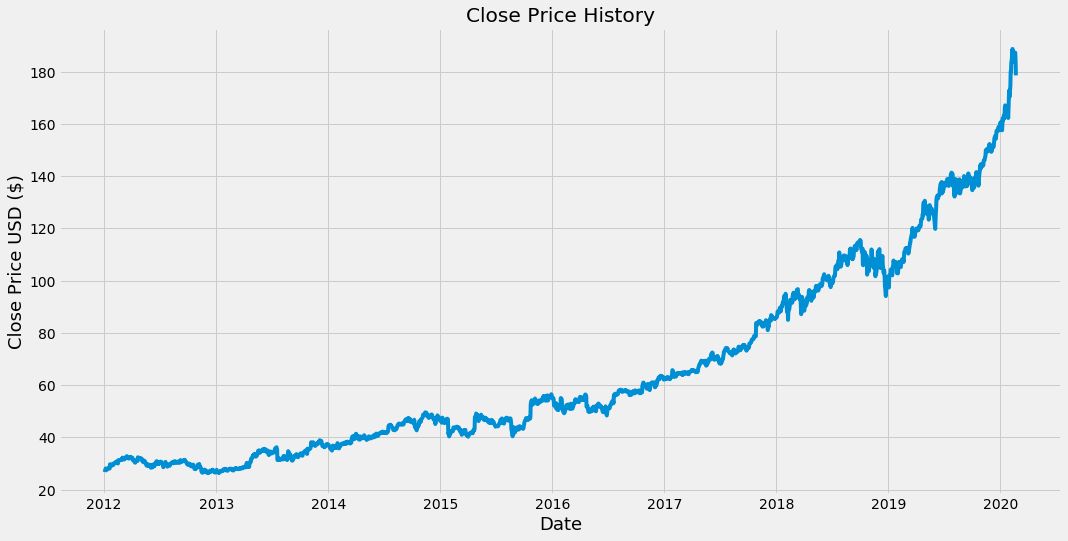

In [ ]:
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [ ]:
data= df.filter(['Close'])
dataset = data.values
training_data_len = math.ceil( len(dataset) * .8 )

training_data_len

1638

In [ ]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.00246411],
       [0.00634509],
       [0.00806998],
       ...,
       [0.9912524 ],
       [0.97363396],
       [0.93771946]])

In [ ]:
train_data = scaled_data[0:training_data_len , :]
x_train = []
y_train = []

for i in range(60, len(train_data)):
  x_train.append(train_data[i-60:i, 0])
  y_train.append(train_data[i, 0])
  if i<= 61:
    print(x_train)
    print(y_train)
    print()

[array([0.00246411, 0.00634509, 0.00806998, 0.0107189 , 0.00843959,
       0.00905562, 0.00831638, 0.01004127, 0.01158134, 0.01164295,
       0.01145813, 0.01078051, 0.02057536, 0.02069857, 0.01829606,
       0.01965132, 0.01928171, 0.01761842, 0.01995934, 0.01946652,
       0.02168422, 0.02205384, 0.02384032, 0.02359391, 0.02451796,
       0.02642764, 0.02710528, 0.025442  , 0.02593482, 0.02390192,
       0.02266986, 0.03030863, 0.03006221, 0.03123267, 0.03018542,
       0.03080145, 0.03147908, 0.03067825, 0.0338816 , 0.03308076,
       0.03646892, 0.03517527, 0.03345037, 0.0319719 , 0.03369679,
       0.03474403, 0.03462083, 0.03492885, 0.03880982, 0.03942586,
       0.03991867, 0.0383786 , 0.0359145 , 0.03462083, 0.03412801,
       0.03468243, 0.03474403, 0.03831701, 0.03788579, 0.03585288])]
[0.03542166100213601]

[array([0.00246411, 0.00634509, 0.00806998, 0.0107189 , 0.00843959,
       0.00905562, 0.00831638, 0.01004127, 0.01158134, 0.01164295,
       0.01145813, 0.01078051, 0.02

In [ ]:
x_train, y_train = np.array(x_train), np.array(y_train)

In [ ]:
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(1578, 60, 1)

In [ ]:
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences= False))
model.add(Dense(25))
model.add(Dense(1))

In [ ]:
confidence_level = 95
confidence_level

95

In [ ]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
model.fit(x_train, y_train, batch_size=1, epochs=1)


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Epoch 1/1





1578/1578 [==============================] - 127s 81ms/step - loss: 4.4408e-04


In [ ]:
 test_data = scaled_data[training_data_len - 60: , :]
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
  x_test.append(test_data[i-60:i, 0])

In [ ]:
x_test = np.array(x_test)

In [ ]:
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

In [ ]:
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

In [ ]:
rmse=np.sqrt(np.mean(((predictions- y_test)**2)))
rmse

3.804909709337594

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


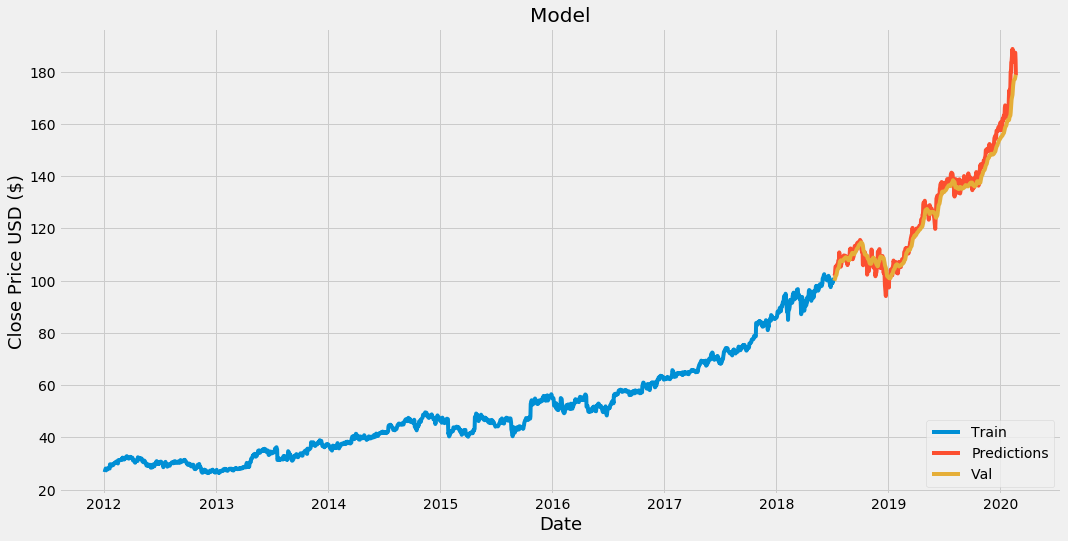

In [ ]:
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
#Visualize the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Predictions', 'Val'], loc='lower right')
plt.show()

In [ ]:
valid

In [ ]:
microsoft_quote = web.DataReader(company, data_source='yahoo', start='2012-01-01', end='2020-02-25')
new_df = microsoft_quote.filter(['Close'])
last_60_days = new_df[-60:].values
last_60_days_scaled = scaler.transform(last_60_days)
X_test = []
X_test.append(last_60_days_scaled)
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
pred_price = model.predict(X_test)
pred_price = scaler.inverse_transform(pred_price)
print(pred_price)

[[177.022]]


In [ ]:
microsoft_quote2 = web.DataReader(company, data_source='yahoo', start='2019-12-18', end='2020-02-29')
print(microsoft_quote2['Close'])
print("The predicted price for ", company, " is ", pred_price, " with a ", confidence_level, "% confidence level")

Date
2019-12-18    154.369995
2019-12-19    155.710007
2019-12-20    157.410004
2019-12-23    157.410004
2019-12-24    157.380005
2019-12-26    158.669998
2019-12-27    158.960007
2019-12-30    157.589996
2019-12-31    157.699997
2020-01-02    160.619995
2020-01-03    158.619995
2020-01-06    159.029999
2020-01-07    157.580002
2020-01-08    160.089996
2020-01-09    162.089996
2020-01-10    161.339996
2020-01-13    163.279999
2020-01-14    162.130005
2020-01-15    163.179993
2020-01-16    166.169998
2020-01-17    167.100006
2020-01-21    166.500000
2020-01-22    165.699997
2020-01-23    166.720001
2020-01-24    165.039993
2020-01-27    162.279999
2020-01-28    165.460007
2020-01-29    168.039993
2020-01-30    172.779999
2020-01-31    170.229996
2020-02-03    174.380005
2020-02-04    180.119995
2020-02-05    179.899994
2020-02-06    183.630005
2020-02-07    183.889999
2020-02-10    188.699997
2020-02-11    184.440002
2020-02-12    184.710007
2020-02-13    183.710007
2020-02-14    185.35